Key Rust Fungi Species and Their Effects:
1. Puccinia graminis (Wheat Stem Rust):
Hosts: Primarily wheat, barley, and rye.
Symptoms:
Reddish-brown pustules on stems and leaves.
Plant weakening, lodging (falling over), and shriveled grains.
Impact:
Can cause up to 100% crop loss in severe cases.
Historic outbreaks led to global food security concerns.
2. Puccinia striiformis (Wheat Stripe Rust):
Hosts: Wheat and barley.
Symptoms:
Yellow-orange stripes of pustules on leaves.
Reduced photosynthesis and premature leaf death.
Impact:
Significant yield losses, especially in cooler climates.
3. Puccinia polysora (Sugarcane Rust):
Hosts: Sugarcane and some grasses.
Symptoms:
Elongated, orange-brown pustules on leaves.
Drying and browning of leaf tips.
Impact:
Reduced sugar content and biomass yield.
Management Strategies:
Resistant Varieties:

Plant rust-resistant strains (e.g., Sr31 gene in wheat for stem rust resistance).
Cultural Practices:

Crop rotation to break rust life cycles.
Removal of alternate hosts (e.g., barberry for P. graminis).
Chemical Control:

Use of fungicides like triazoles and strobilurins during critical growth stages.
Biological Control:

Research on antagonistic fungi and beneficial microbes is ongoing to provide eco-friendly control options.

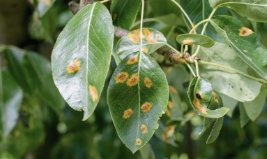

Powdery Mildew Overview:
Pathogen: Various fungi in the order Erysiphales (e.g., Erysiphe, Podosphaera species).
Hosts: Affects a wide range of plants including cucurbits, grapes, roses, wheat, tomatoes, and ornamentals.
Symptoms:
Distinctive White Powdery Spots on leaves, stems, and sometimes fruits.
Lower leaves are typically the first and most severely infected.
As the disease progresses:
Spots enlarge and coalesce, covering entire leaf surfaces.
Leaves may yellow, curl, and drop prematurely.
Reduced photosynthesis and overall plant vigor.
Favorable Conditions for Growth:
High humidity (but not water-soaked surfaces).
Moderate temperatures (~15°C to 27°C / 59°F to 81°F).
Greenhouses provide ideal conditions due to controlled humidity and temperature.
Impact on Agriculture & Horticulture:
Yield Losses: Reduced fruit size and quality.
Aesthetic Damage: Particularly harmful to ornamentals.
Weakened Plants: Higher susceptibility to other diseases and stress.
Management Strategies:
Chemical Control:

Use of fungicides like sulfur, triazoles, or strobilurins.
Rotate fungicides to prevent resistance build-up.
Bio-organic Methods:

Application of neem oil, potassium bicarbonate, or milk sprays (milk has antifungal properties).
Use of beneficial microbes (e.g., Bacillus subtilis) that antagonize the fungus.
Genetic Resistance:

Cultivation of resistant crop varieties (e.g., powdery mildew-resistant cucurbits or wheat strains).
Cultural Practices:

Ensure proper air circulation by adequate plant spacing and pruning.
Avoid overhead watering to reduce humidity on foliage.
Regularly remove and destroy infected plant parts.

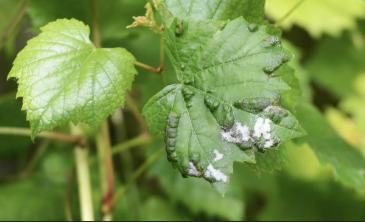

In [ ]:
!pip install -q addict

# This command installs the 'addict' library quietly (-q means no extra messages).
# 'addict' helps make working with dictionaries easier by allowing dot notation access
# (e.g., data.user.name instead of data['user']['name']) and auto-creates nested dictionaries.


In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import models
from PIL import Image
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
import numpy as np
import os
import random
from addict import Dict
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import logging

# PyTorch & Torch Libraries:
# torch: The core PyTorch library for deep learning and tensor operations.
# torch.nn: Contains neural network layers, loss functions, and other utilities for building models.
# torch.utils.data.Dataset: A class for creating custom datasets.
# torch.utils.data.DataLoader: A utility to load datasets in batches, which is useful for training models.
# torch.optim.AdamW: The Adam optimizer with weight decay (useful for training deep learning models).
# torch.optim.lr_scheduler.ReduceLROnPlateau: A learning rate scheduler that reduces the learning rate when the model stops improving.
# Vision Libraries:
# torchvision.models: A collection of pre-trained models like ResNet, VGG, etc., for transfer learning or feature extraction.
# PIL.Image: The Python Imaging Library (Pillow) for opening and manipulating images.
# albumentations: A library for image augmentation, which helps create variations of images for better generalization.
# albumentations.pytorch.transforms.ToTensorV2: Used for converting images to PyTorch tensors during data augmentation.
# Data Handling & Misc:
# numpy: A library for handling arrays and mathematical functions.
# os: For interacting with the file system (e.g., listing files, working with directories).
# random: For generating random numbers and selecting random items (often used for data shuffling).
# addict.Dict: Provides a dictionary that allows attribute-style access to keys (e.g., data.user.name).
# seaborn: A data visualization library built on top of Matplotlib, particularly useful for statistical plots.
# matplotlib.pyplot: A basic plotting library for creating graphs and figures.
# tqdm: A library to create progress bars in loops, making long-running processes more user-friendly.
# logging: Used for logging messages in Python, often for debugging and tracking the execution flow.


# **Functions**

In [ ]:
# The seed_everything function makes sure that everything in your code that uses randomness (like shuffling or initializing weights) behaves the same way every time you run it.

# Here's what it does:
# Sets a "starting point" (seed) for random numbers so that the results don't change randomly.
# It does this for:
# Python's random functions
# NumPy (for math operations)
# PyTorch (for machine learning tasks)
# Why is it useful?
# Consistency: If you run the code again, you will get the same results, which is important for testing or comparing things.
# Reproducibility: It helps others get the same results when they run your code.
# In simple terms, it helps make sure your experiments are fair and repeatable!
# It picks same random numbers every time



def seed_everything(seed:int=42) -> None:
    # Set the random seed for Python's built-in random library
    random.seed(seed)

    # Set the seed for the environment variable (useful for parallel computing)
    os.environ['PYTHONASSEED'] = str(seed)

    # Set the seed for NumPy's random number generator
    np.random.seed(seed)

    # Set the seed for PyTorch's random number generator on the CPU
    torch.manual_seed(seed)

    # Set the seed for PyTorch's random number generator on the GPU (if available)
    torch.cuda.manual_seed(seed)

    # Ensure reproducibility by using deterministic algorithms in CuDNN (GPU acceleration)
    torch.backends.cudnn.deterministic = True

    # Allow CuDNN to optimize operations but ensure deterministic behavior
    torch.backends.cudnn.benchmark = False

#_________________________________________________________________________________________________________________________________________________________

def get_optimizer(model: torch.nn.Module, name: str = "SGD", parameters: dict = {}) -> torch.optim.Optimizer:
    # Dictionary of possible optimizers
    optimizers = {
        "SGD": torch.optim.SGD,
        "AdamW": torch.optim.AdamW,
        "Adam": torch.optim.Adam,
        "RMSprop": torch.optim.RMSprop,
    }

    # Get the chosen optimizer (defaults to 'SGD' if not found)
    instance = optimizers.get(name, torch.optim.SGD)

    # Create and return the optimizer for the model with given parameters
    optimizer = instance(model.parameters(), **parameters)

    return optimizer

# This function helps you quickly switch between different optimizers (like SGD, Adam, etc.)
# without rewriting the optimizer setup every time. You just call it with the optimizer name you want!

# ________________________________________________________________________________________________________________________________________________________________

def get_scheduler(optimizer: torch.optim.Optimizer, name: str, parameters: dict):
    # Dictionary of possible learning rate schedulers
    schedulers = {
        "ReduceLROnPlateau": torch.optim.lr_scheduler.ReduceLROnPlateau,
        "LambdaLR": torch.optim.lr_scheduler.LambdaLR,
        "StepLR": torch.optim.lr_scheduler.StepLR,
        "ExponentialLR": torch.optim.lr_scheduler.ExponentialLR,
        "MultiplicativeLR": torch.optim.lr_scheduler.MultiplicativeLR,
        "MultiStepLR": torch.optim.lr_scheduler.MultiStepLR,
    }

    # Get the scheduler class based on the name
    instance = schedulers[name]

    # Create the scheduler instance and return it
    scheduler = instance(optimizer, **parameters)

    return scheduler



# What It Does:
# Takes in an optimizer (optimizer: torch.optim.Optimizer), a scheduler name (name: str), and additional parameters (parameters: dict).
# Looks up the scheduler from the provided dictionary of options like StepLR, ReduceLROnPlateau, etc.
# Creates and returns a learning rate scheduler based on the chosen scheduler and its parameters, which adjusts the learning rate during training.
# Why Is This Useful?
# Learning rate schedulers help adjust the learning rate during training, which can improve convergence and performance. This function simplifies using different schedulers without manually setting them up each time.

# __________________________________________________________________________________________________________________________________________________________________

def accuracy_score(predictions: torch.Tensor, targets: torch.Tensor) -> torch.Tensor:
    # Count how many predictions match the targets
    amount = (predictions == targets).sum()

    # Calculate accuracy by dividing matching predictions by the total number of targets
    accuracy = amount / targets.size(0)

    return accuracy


# What It Does:
# Compares predictions to targets: It checks if each prediction matches the corresponding target.
# Sums up the matches: (predictions == targets) creates a tensor of True/False values, where True is treated as 1 and False as 0. .sum() adds up all the True values, i.e., the correct predictions.
# Calculates accuracy: The function then divides the number of correct predictions (amount) by the total number of targets (targets.size(0), which is the number of examples) to get the accuracy.
# Why Is This Useful?
# Accuracy is a common measure of model performance. It tells you the percentage of correct predictions out of all predictions made.

# ___________________________________________________________________________________________________________________________________________________________________

def hide_spines(ax, spines=["top", "right", "left", "bottom"]):
    # Loop through each specified spine and make it invisible
    for spine in spines:
        ax.spines[spine].set_visible(False)

# The hide_spines function is used to hide certain borders (spines) around a plot in Matplotlib.

# ________________________________________________________________________________________________________________________________________________________________________

def plot_images(rows, cols, indexes, class_=0):
    min_index = min(indexes)  # Get the smallest index from the given range
    max_index = max(indexes)  # Get the largest index from the given range
    fig = plt.figure(figsize=(3*cols, 3*rows))  # Set up the plot's size

    for i in range(*indexes):  # Loop through the given range of indexes
        item = train_dataset[i]  # Get an item from the dataset
        image = item.image  # Get the image
        label = item.label  # Get the label of the image

        if label == class_:  # Check if the label matches the specified class
            ax = fig.add_subplot(rows, cols, (i - min_index) + 1)  # Set up subplot for each image
            ax.imshow(image.permute(1, 2, 0))  # Display the image
            ax.xaxis.set_visible(False)  # Hide x-axis
            ax.yaxis.set_visible(False)  # Hide y-axis

    # Add a title to the plot
    fig.text(s=f"{train_dataset.labels[class_]} leaves", x=0.125, y=0.9, fontweight="bold", fontfamily="serif", fontsize=20)
    fig.show()  # Show the plot


# What It Does:
# Takes in:
# rows and cols: Number of rows and columns for the grid of images.
# indexes: A range of indexes for images to display.
# class_: A class label (default is 0) to filter images by.
# Loops through the dataset (train_dataset) and filters images based on the provided class_ label.
# Displays the images on a grid, where each subplot shows one image. The x and y axes are hidden for a cleaner look.
# Adds a title at the top of the figure to indicate the class of the images displayed (e.g., "leaves" for the class 0).
# Why Is This Useful?
# This function is useful when you want to visualize images from a dataset, particularly when you're interested in showing only images from a specific class.

# _______________________________________________________________________________________________________________________________________________________________________________

def get_logger(name: str = __name__, format: str = "[%(asctime)s][%(levelname)s]: %(message)s") -> logging.Logger:
    # Get a logger instance with the specified name (default is the current module name)
    logger = logging.getLogger(name)
    logger.setLevel(logging.INFO)  # Set the logging level to INFO

    # Define the format for log messages
    formatter = logging.Formatter(format)

    # Set up a file handler to log to a file
    file_handler = logging.FileHandler(name)  # Log messages to a file named after the logger
    file_handler.setLevel(logging.INFO)  # Log only INFO level and higher messages
    file_handler.setFormatter(formatter)  # Apply the formatter to the file handler

    # Set up a stream handler to log to the console (stdout)
    stream_handler = logging.StreamHandler()
    stream_handler.setLevel(logging.INFO)  # Log only INFO level and higher messages
    stream_handler.setFormatter(formatter)  # Apply the formatter to the stream handler

    # Add both handlers to the logger
    logger.addHandler(stream_handler)
    logger.addHandler(file_handler)

    # Prevent the logger from propagating messages to the root logger
    logger.propagate = False

    return logger


# What It Does:
# Creates a logger with a given name (or the default module name).
# Sets the logging level to INFO, which means it will record messages of level INFO or higher (e.g., WARNING, ERROR).
# Creates a formatter for the log message format (it includes the timestamp, log level, and message).
# Adds two handlers:
# A file handler to write logs to a file named after the logger's name.
# A stream handler to display logs in the console.
# Prevents log propagation to higher-level loggers (like the root logger).
# Why Is This Useful?
# This function helps you set up logging in your application, allowing you to track events and errors both in the terminal and in log files. It provides visibility into the application's behavior during development or when debugging.

# _________________________________________________________________________________________________________________________________________________________________________________



# **Configs**

In [ ]:
# config as a special dictionary that stores important file paths for your project
config = Dict({
    "train_path": "../input/plant-disease-recognition-dataset/Train/Train",
    "test_path": "../input/plant-disease-recognition-dataset/Test/Test",
    "validation_path": "../input/plant-disease-recognition-dataset/Validation/Validation"
})


# This code sets up a training plan for your plant disease model. 🌿✨

# What It Does:
# Device:

# Uses GPU (if available) or CPU to train faster.
# Training Settings:

# Train 5 times over the data (epochs = 5).
# Fixes randomness with seed = 2021 (for repeatable results).
# Images are resized to 128x128 with 3 color channels (RGB).
# Loads 32 images at a time (batch_size = 32).
# Image Augmentations:

# Random flips (left-right and up-down) to make the model stronger.
# Converts images into tensors for PyTorch.
# Optimizer:

# Uses AdamW (a tool that helps the model learn).
# Learning speed starts at 0.001.
# Weight decay (0.01) helps prevent overfitting.
# Learning Rate Scheduler:

# Slows down learning if the model isn’t improving after 2 tries.
# Reproducibility:

# seed_everything makes sure results stay the same if you run the code again.

train_config = Dict({
    "device": torch.device("cuda" if torch.cuda.is_available() else "cpu"),
    "epochs": 5,
    "seed": 2021,
    "image_shape": (128, 128),
    "image_channels": 3,
    "num_workers": 0,
    "batch_size": 32,

    "augmentations": A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        #A.Blur(p=1),
        ToTensorV2(),
    ]),
    "optimizer": {
        "type": "AdamW",
        "parameters": {
            "lr": 0.001,
            "weight_decay": 0.01,
        }
    },

    "scheduler": {
        "type": "ReduceLROnPlateau",
        "parameters": {
            "patience": 2,
            "mode": "min",
            "factor": 0.1,
        }
    }
})


seed_everything(train_config.seed)

# **Dataset**

This class helps load and process plant images for your model! 📸➡️🤖

1️⃣ What Does It Do?
It finds all images in a folder, remembers their labels (like "Healthy" or "Infected"), and gets them ready for training.

2️⃣ Key Parts:
🔸 __init__ (Setup the Dataset):
Takes the path to images.
Finds images inside folders (each folder is a label, like "Tomato Blight").
Saves image paths + their labels in a list.

🔸 _load (Load an Image):
Opens an image from the path.
Resizes it to the given image_shape (like 256x256).
Converts it to a PyTorch tensor for training.

🔸 __len__ (How Many Images?):
Returns the total number of images in the dataset.

🔸 __getitem__ (Get One Image):
Picks an image by index, loads it, applies augmentations (like flips), and returns:
The image.
Its label (as a number, like 0 for "Healthy", 1 for "Rust").

3️⃣ Bonus: collate_fn (Batching Data)
Combines multiple images into a batch so they can be fed into the model together.
Returns:
A batch of images.
A batch of labels.

In [ ]:
class PlantDiseaseDataset(Dataset):
    def __init__(self, path, augmentations=None, image_shape=(256, 256), channels="RGB"):
        self.__images_labels = []
        self.image_shape = image_shape
        self.channels = channels
        self.augmentations = augmentations

        if os.path.exists(path):
            self.labels = os.listdir(path)
            for label in self.labels:
                label_path = os.path.join(path, label)
                if os.path.isdir(label_path):
                    files = os.listdir(label_path)
                    for file in files:
                        if file.endswith("jpg") or file.endswith("png"):
                            image_path = os.path.join(label_path, file)
                            self.__images_labels.append((image_path, label))
                        else:
                            pass
                else:
                    pass

        else:
            pass

    def _load(self, path, channels="RGB"):
        width, height = self.image_shape
        loader = A.Compose([
            A.Resize(width=width, height=height),
            ToTensorV2(),
        ])

        image_array = np.array(Image.open(path).convert(channels))
        return loader(image=image_array)["image"]

    def __len__(self):
        return len(self.__images_labels)

    def __getitem__(self, index):
        path, label = self.__images_labels[index]
        image = self._load(path)

        if self.augmentations is not None:
            image = image.permute(1, 2, 0).numpy()
            image = self.augmentations(image=image)["image"]

        label = self.labels.index(label)

        return Dict({
            "image": image,
            "label": label,
        })


def collate_fn(batch):
    all_images, all_labels = [], []
    for item in batch:
        image = item.image
        label = item.label

        all_images.append(item.image.tolist())
        all_labels.append(label)

    return {
        "images": torch.tensor(all_images),
        "labels": torch.tensor(all_labels, dtype=torch.int8)
    }





# **Exploratory Data Analysis**

In [ ]:
train_dataset = PlantDiseaseDataset(path=config.train_path,
                                    image_shape=train_config.image_shape,
                                    channels=train_config.image_channels)

# This line creates a dataset called train_dataset using your PlantDiseaseDataset class! 🌿📸

# What’s Happening?
# path=config.train_path 🗂️

# Loads images from the training folder you set earlier in config.
# image_shape=train_config.image_shape 📏

# Resizes all images to the shape you defined, e.g., (128, 128) pixels.
# channels=train_config.image_channels 🎨

# Loads images with 3 color channels (RGB) for colored images.
# Result:
# You now have train_dataset containing all your training images and their labels, ready for training your model! 🚀

In [ ]:
label_pathes = [os.path.join(config.train_path, label) for label in train_dataset.labels]
label_files = [os.listdir(path) for path in label_pathes]
amount = [len(files) for files in label_files]

palette = sns.color_palette(["#5FB924", "#AB4800", "#B2BBAC"])
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()
ax.grid(color="lightgrey", axis="both", alpha=0.8, zorder=0)
sns.barplot(x=train_dataset.labels, y=amount, palette=palette,  ec="#000", linewidth=1.5, zorder=2, ax=ax)
ax.xaxis.set_tick_params(labelsize=14, size=0, pad=10)
ax.yaxis.set_tick_params(labelsize=12, size=0, pad=5)
ax.set_yticks(list(range(0, 450, 50)))
ax.set_title(f"Classes Distribution", fontsize=20, fontweight="bold", fontfamily="serif", loc="left", y=1.01)
ax.set_xlabel("Classes", fontsize=15, fontfamily="serif", labelpad=5)
ax.set_ylabel("Count", fontsize=15, fontfamily="serif", labelpad=5)
hide_spines(ax)
fig.show()

# This code creates a bar plot 📊 showing how many images there are for each plant disease class in your training dataset. 🌿

# 💡 What’s Happening?
# Counting Images Per Class:

# label_pathes: Gets the path to each class folder (e.g., "Apple Scab", "Healthy").
# label_files: Lists all image files in each class folder.
# amount: Counts how many images are in each class.
# Plotting with Seaborn + Matplotlib:

# A bar chart is created with class names on the x-axis and image counts on the y-axis.
# Uses custom colors 🌈 and styles for a clean look.
# hide_spines(ax) removes the chart borders for a minimalist style.
# The Result:

# You'll get a visual representation of how balanced your dataset is.
# If one class has way more images than others, it could impact model training (class imbalance). ⚖️

AttributeError: 'PlantDiseaseDataset' object has no attribute 'labels'

In [ ]:
plot_images(rows=5, cols=5, indexes=(0, 25), class_=0)
# This code plots 25 images (5x5 grid) from the training dataset that belong to class 0.
# It helps visualize samples of a specific class for quick inspection.

In [ ]:
plot_images(rows=5, cols=5, indexes=(500, 525), class_=1)
# This code displays 25 images (5x5 grid) from the training dataset, between indexes 500 and 525, that belong to class 1.
#  It helps visualize examples from a specific class.

In [ ]:
plot_images(rows=5, cols=5, indexes=(len(train_dataset)-25, len(train_dataset)), class_=2)
# This code shows the last 25 images from the training dataset (in a 5x5 grid) that belong to class 2.
# It's useful to visualize samples from the end of the dataset for that class

# **Preprate the Datasets & Data Loaders**

This code initializes three datasets for training, validation, and testing using the PlantDiseaseDataset class. Here's what each part does:

train_dataset: Loads the training data, applies augmentations (like flips), and resizes images to the specified shape.
validation_dataset: Loads the validation data with similar settings to the training dataset for model evaluation.
test_dataset: Loads the test data for final model evaluation, ensuring the same image transformations are applied.
All datasets are prepared with the same image shape and channels (RGB), and augmentations are applied to introduce variability and improve model generalization

In [ ]:
train_dataset = PlantDiseaseDataset(path=config.train_path,
                                    augmentations=train_config.augmentations,
                                    image_shape=train_config.image_shape,
                                    channels=train_config.image_channels)

validation_dataset = PlantDiseaseDataset(path=config.validation_path,
                                         augmentations=train_config.augmentations,
                                         image_shape=train_config.image_shape,
                                         channels=train_config.image_channels)

test_dataset = PlantDiseaseDataset(path=config.test_path,
                                   augmentations=train_config.augmentations,
                                   image_shape=train_config.image_shape,
                                   channels=train_config.image_channels)

This code initializes data loaders for training, validation, and testing datasets:

train_loader: Loads batches from the training dataset, shuffling the data and using collate_fn to properly format the batch. It uses the specified batch_size and enables multi-threading with num_workers for faster data loading.
validation_loader: Loads batches from the validation dataset with a larger batch size (double the training batch size) and does not shuffle the data since the order doesn’t matter for validation.
test_loader: Loads batches from the test dataset, also with a larger batch size, and does not shuffle the data.
These loaders help efficiently manage the dataset during training and evaluation, especially when the data is large.

In [ ]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=train_config.batch_size,
                          num_workers=train_config.num_workers,
                          pin_memory=True,
                          shuffle=True,
                          collate_fn=collate_fn)

validation_loader = DataLoader(dataset=validation_dataset,
                               batch_size=train_config.batch_size*2,
                               num_workers=train_config.num_workers,
                               pin_memory=True,
                               shuffle=False,
                               collate_fn=collate_fn)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=train_config.batch_size*2,
                         num_workers=train_config.num_workers,
                         pin_memory=True,
                         shuffle=False,
                         collate_fn=collate_fn)

# **Modelling**

This code defines a custom deep learning model for plant disease classification using the ResNet-34 architecture:

__init__ method:

Loads a pre-trained ResNet-34 model.
Freezes all layers of the pre-trained model by setting parameter.require_grad = False, meaning these layers won't be updated during training.
Modifies the fully connected (fc) layer of ResNet-34 to match the number of output classes (e.g., 2 classes for binary classification), and applies Softmax to the output to get class probabilities.
forward method:

Passes an image through the ResNet-34 model and returns the output (predicted class probabilities).
This model is set up to classify images of plant diseases, with fine-tuned layers while retaining the learned features of ResNet-34.

In [ ]:
class PlantDiseaseModel(nn.Module):
    def __init__(self, classes=2):
        super(PlantDiseaseModel, self).__init__()
        self.model = models.resnet34(pretrained=True)

        for parameter in self.model.parameters():
            parameter.require_grad = False

        in_features = self.model.fc.in_features
        self.model.fc = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=classes),
            nn.Softmax(dim=1)
        )

    def forward(self, image):
        output = self.model(image)
        return output

This code defines a Trainer class that helps in training and evaluating a deep learning model using PyTorch:

__init__ method:

Initializes the trainer with the model, loss function (criterion), optimizer, metric (e.g., accuracy), optional learning rate scheduler, and logger.
Sets the device (CPU or GPU) for training.
Initializes history to store metrics and losses during training.
__log method:

Logs metrics like loss and score (accuracy) for each epoch into self.history.
evaluate method:

Evaluates the model on a given dataset (loader), computing the average loss and metric score (e.g., accuracy) for the dataset.
fit method:

Trains the model for a given number of epochs:
Training: Computes loss and metric for each batch, updates the model weights, and logs results.
Validation: Optionally evaluates the model after each epoch on a validation dataset.
Scheduler: Adjusts the learning rate using the learning rate scheduler.
Logs both training and validation metrics and losses if a logger is provided.
In summary, this class automates the process of training, evaluating, and logging model performance during training, making it easier to track progress and fine-tune the model.









In [ ]:
class Trainer:
    def __init__(self, model, criterion, optimizer,  metric, scheduler=None, logger=None, device="cpu"):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.scheduler = scheduler
        self.logger = logger
        self.device = torch.device(device)
        self.best_validation_loss = 0
        self.metric = metric
        self.history = Dict({})

    def __log(self, logs):
        for k, v in logs.items():
            if k not in self.history:
                self.history[k] = []

            self.history[k].append(v)

    def evaluate(self, loader):
        loss, score, length = 0, 0, len(loader)

        self.model.to(self.device)
        with torch.no_grad():
            loop = tqdm(loader, position=0, colour="BLACK", desc=f"Evaluating: ", leave=True)
            for batch in loop:
                if self.device.type != "cpu": torch.cuda.empty_cache()
                self.model.eval()

                images = batch["images"].float().to(self.device)
                labels = batch["labels"].long().to("cpu")

                probabilities = self.model(images).float().to("cpu")
                predictions = torch.argmax(probabilities, dim=1).detach()

                batch_loss = self.criterion(probabilities, labels)
                loss += batch_loss.item()

                batch_score = self.metric(predictions, labels).item()
                score += batch_score

            loss /= length
            score /= length

        return loss, score


  def fit(self, train_loader, validation_loader=None, epochs=10):
        self.model.to(self.device)
        train_length = len(train_loader)

        for epoch in range(epochs):
            epoch_loss, epoch_score = 0, 0

            loop = tqdm(train_loader, position=0, colour="BLACK", leave=True, desc=f"Epoch [{epoch+1}/{epochs}]: ")
            for batch in loop:
                if self.device.type != "cpu": torch.cuda.empty_cache()
                self.optimizer.zero_grad()
                self.model.train()

                images = batch["images"].float().to(self.device)
                labels = batch["labels"].long().to("cpu")

                probabilities = self.model(images).float().to("cpu")
                predictions = torch.argmax(probabilities, dim=1).detach()

                batch_loss = self.criterion(probabilities, labels)
                epoch_loss += batch_loss.item()

                batch_score = self.metric(predictions, labels).item()
                epoch_score += batch_score

                batch_loss.backward()
                self.optimizer.step()

            epoch_loss /= train_length
            epoch_score /= train_length

            self.__log({"train_losses": epoch_loss, "train_scores": epoch_score})
            if self.logger is not None: self.logger.info(f"Epoch [{epoch+1}/{epochs}]: Loss: {epoch_loss} | Metric: {epoch_score}")

            if validation_loader is not None:
                validation_loss, validation_score = self.evaluate(validation_loader)
                self.__log({"validation_losses": validation_loss, "validation_scores": validation_score})
                if self.logger is not None: self.logger.info(f"Validation Epoch [{epoch+1}/{epochs}]: Loss: {validation_loss} | Metric: {validation_score}")



                if self.scheduler is not None:
                    if isinstance(self.scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
                        self.scheduler.step(validation_loss)
                    else:
                        self.scheduler.step()

                    if self.logger is not None:
                        lr = self.optimizer.param_groups[0]["lr"]
                        self.logger.info(f"Epoch [{epoch+1}/{epochs}] Learning Rate: {lr}")

Here, you're setting up and initializing the training components for your PlantDiseaseModel:

Model:

model = PlantDiseaseModel(classes=len(train_dataset.labels)): Initializes the PlantDiseaseModel with the number of classes equal to the number of labels in the dataset.
Loss function:

criterion = nn.CrossEntropyLoss(): Uses Cross Entropy Loss, commonly used for multi-class classification problems.
Optimizer:

optimizer = get_optimizer(...): Retrieves an optimizer (like AdamW) using the get_optimizer function and the specified configuration from train_config.
Scheduler (optional):

If a learning rate scheduler is specified in the train_config, the scheduler is initialized using get_scheduler.
Logger:

trainer_logger = get_logger("trainer"): Initializes a logger to track training progress and log the metrics and losses during training.
Trainer:

trainer = Trainer(...): Initializes the Trainer class, which takes in the model, criterion, optimizer, metric (accuracy score function), scheduler, and logger. This class will manage the training process and evaluation.
Now, you're ready to call trainer.fit() to start training the model.

In [ ]:
model = PlantDiseaseModel(classes=len(train_dataset.labels))
criterion = nn.CrossEntropyLoss()
optimizer = get_optimizer(model=model,
                          name=train_config.optimizer.type,
                          parameters=train_config.optimizer.parameters)

if "scheduler" in train_config:
    scheduler = get_scheduler(optimizer=optimizer,
                              name=train_config.scheduler.type,
                              parameters=train_config.scheduler.parameters)

trainer_logger = get_logger("trainer")
trainer = Trainer(model=model,
                  criterion=criterion,
                  metric=accuracy_score,
                  optimizer=optimizer,
                  scheduler=scheduler,
                  logger=trainer_logger,
                  device=train_config.device)

You're calling the fit method to start the training process for the PlantDiseaseModel:

Training Data:

train_loader=train_loader: Passes the training data loader to the fit method for training the model.
Validation Data:

validation_loader=validation_loader: Passes the validation data loader to evaluate the model during training.
Epochs:

epochs=train_config.epochs: Specifies the number of epochs (iterations over the entire dataset) for training, as defined in your configuration.
Once you run this, the model will train for the specified number of epochs, evaluating the performance on the validation set after each epoch. Training progress, losses, and metrics will be logged during the process.

In [ ]:
trainer.fit(train_loader=train_loader,
            validation_loader=validation_loader,
            epochs=train_config.epochs)

This code visualizes the training and validation losses over epochs:

Plot Setup:

Creates a figure and an ax (subplot) for the graph, with customized grid and axis settings.
Plotting:

sns.lineplot: Plots the training and validation losses (from trainer.history.train_losses and trainer.history.validation_losses) over the epochs.
Red line represents the training loss, and the blue line represents the validation loss.
Labels and Title:

Adds a title, axis labels, and a legend to the plot.
Visibility:

Removes spines (borders) for a cleaner look with hide_spines() and adjusts tick sizes for both axes.
Displaying:

The fig.show() command displays the plot.
It provides a clear overview of how the model's loss evolves during training and validation, which can help identify potential overfitting or underfitting issues.










In [ ]:
epochs_ = range(1, train_config.epochs+1)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
ax.grid(color="lightgrey", axis="both", alpha=0.8, zorder=0)
sns.lineplot(x=epochs_, y=trainer.history.train_losses, color="red", marker="o", label="Train Loss", zorder=2, ax=ax)
sns.lineplot(x=epochs_, y=trainer.history.validation_losses, color="blue", marker="o", label="Validation Loss", zorder=2, ax=ax)
ax.set_title("Train & Validation Losses", fontsize=20, fontweight="bold", fontfamily="serif", loc="left", y=1.05)
hide_spines(ax)
ax.xaxis.set_tick_params(labelsize=12, size=0, pad=10)
ax.yaxis.set_tick_params(labelsize=12, size=0, pad=5)
ax.set_xlabel("Epochs", fontsize=15, fontfamily="serif", labelpad=10)
ax.set_ylabel("Loss", fontsize=15, fontfamily="serif", labelpad=5)
ax.legend()
fig.show()

This code generates a plot showing the training and validation accuracy over epochs:

Plot Setup:

A figure with specified size (10, 5) is created, and a subplot (ax) is added.
A light grey grid is set to appear in the background.
Plotting Accuracy:

sns.lineplot: Plots the training accuracy (trainer.history.train_scores) in red and validation accuracy (trainer.history.validation_scores) in blue.
The marker="o" adds circular markers at each epoch for better visualization.
Title and Labels:

Title: "Train & Validation Accuracy" with a bold font and left alignment.
x-axis labeled "Epochs" and y-axis labeled "Accuracy" with appropriate font settings.
Aesthetics:

hide_spines() removes the plot borders for a cleaner look.
Tick sizes for both axes are adjusted using ax.xaxis.set_tick_params and ax.yaxis.set_tick_params.
Displaying:

The fig.show() command displays the plot.
This plot helps track the accuracy trends during training and validation, which can highlight how well the model is generalizing across epochs.

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
ax.grid(color="lightgrey", axis="both", alpha=0.8, zorder=0)
sns.lineplot(x=epochs_, y=trainer.history.train_scores, color="red", marker="o", label="Train Accuracy", zorder=2, ax=ax)
sns.lineplot(x=epochs_, y=trainer.history.validation_scores, color="blue", marker="o", label="Validation Accuracy", zorder=2, ax=ax)
ax.set_title("Train & Validation Accuracy", fontsize=20, fontweight="bold", fontfamily="serif", loc="left", y=1.05)
hide_spines(ax)
ax.xaxis.set_tick_params(labelsize=12, size=0, pad=10)
ax.yaxis.set_tick_params(labelsize=12, size=0, pad=5)
ax.set_xlabel("Epochs", fontsize=15, fontfamily="serif", labelpad=10)
ax.set_ylabel("Accuracy", fontsize=15, fontfamily="serif", labelpad=5)
ax.legend()
fig.show()

# **References**


Resnet50 - https://arxiv.org/abs/1512.03385

Adam - https://arxiv.org/abs/1512.03385

Cross Entropy Loss - https://machinelearningmastery.com/cross-entropy-for-machine-learning/